### Student details

Student name: Ananya Krithika Thyagarajan


Student ID: 23187123

# Task 1: Perceptrons

* Weight/height Data obtained from https://github.com/johnmyleswhite/ML_for_Hackers

In [51]:
# import dependencies
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#this line the plots to be embedded into the notebook
%matplotlib inline

from pylab import rcParams
rcParams['figure.figsize'] = 12,10
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### Perceptron class
From: https://sebastianraschka.com/Articles/2015_singlelayer_neurons.html

**Note:** The predict function returns either 1 or -1 as labels for the data. Therefore, the training data must match these labels.

In [52]:
class Perceptron(object):

    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1],dtype=np.float64)
        self.errors_ = []

        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] +=  update * xi
                self.w_[0] +=  update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

### Read the data 
(provided - should be completed in previous E-tivity)

In [53]:
import pandas as pd


# Read the data from the .csv, using the first row as the headers of the data
data = pd.read_csv('C:/Users/Ananya/Documents/UL/Intro to Data Engineering/Data/01_heights_weights_genders.csv',header=0)
X = data.iloc[:,1:3].values # X is the features in our dataset
y = data.iloc[:,0].values

# y is the Labels in our dataset, converted to integers
# Note the conversion to 1 and -1, to match the perceptron class
y = np.where(y == "Female", 1, -1)

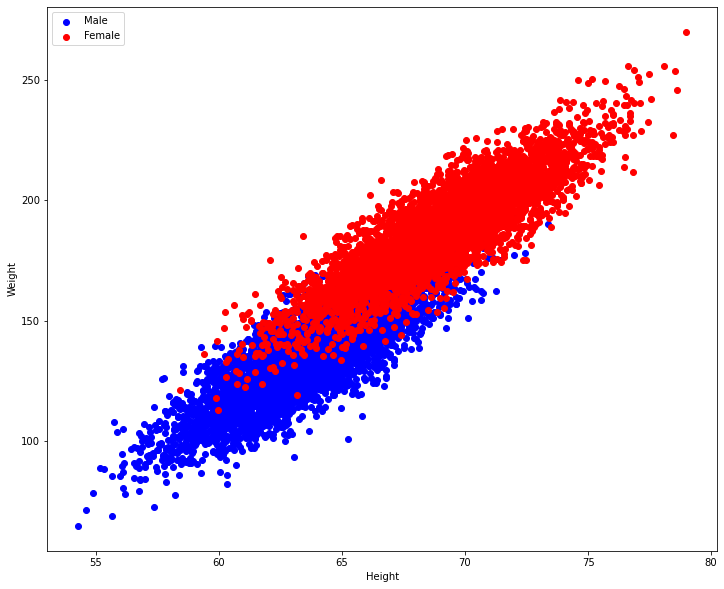

In [75]:
import matplotlib.pyplot as plt
#plt.scatter(X[:,0], X[:,1],c=y);

plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Male')
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', label='Female')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()
plt.show()


### Train/Test Split 
(provided - should be completed in previous E-tivity)

In [76]:
# divide the dataset in train test using scikit learn
# now the model will train in training dataset and then we will use test dataset to predict its accuracy
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

# set random_state to a fixed number, so while the outcome is random, it is repeatible (same result each time)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) 

In [77]:
X_train.shape, X_test.shape

((6700, 2), (3300, 2))

In [78]:
y_train

array([ 1,  1,  1, ...,  1, -1,  1])

### Train the algorithm (Task)

In [79]:
################################
# Your code here

# training the perceptron 
percept = Perceptron(eta=0.1, epochs=50)
percept.train(X_train, y_train)

# Retrieve the errors for each epoch
errors = percept.errors_

errors

[1228,
 940,
 907,
 897,
 866,
 852,
 833,
 870,
 847,
 842,
 827,
 839,
 849,
 829,
 835,
 831,
 864,
 848,
 836,
 846,
 840,
 857,
 834,
 827,
 831,
 834,
 855,
 847,
 840,
 837,
 842,
 848,
 831,
 821,
 846,
 866,
 831,
 844,
 836,
 829,
 835,
 831,
 864,
 839,
 839,
 849,
 829,
 835,
 827,
 870]

### Calculate the accuarcy score using the test data and sklearn.metrics (Task)

In [96]:
################################
# Your code here


# Predict on test data
y_pred = percept.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.8545454545454545

### Visualisations (Task)

1. Visualise the errors at each training epoch. Hint, the errors for each epoch are stored in the errors class variable


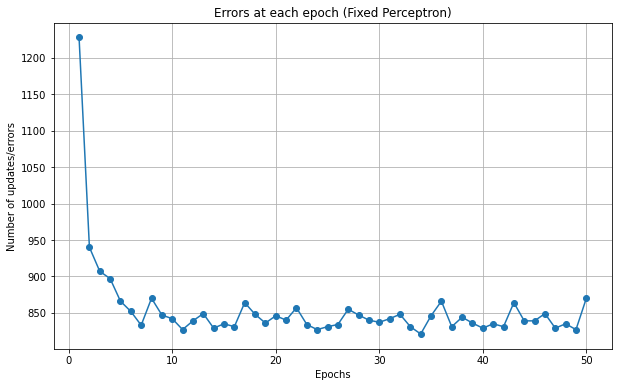

In [95]:
# Plot the errors for each epoch
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(errors) + 1), errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates/errors')
plt.title('Errors at each epoch (Fixed Perceptron)')
plt.grid(True)
plt.show()



2. Using many random inputs (e.g. 5000) plot to see if you can see the decision boundary. In this case, you will not be using the pandas dataframe, so it is probably better to use matplotlib

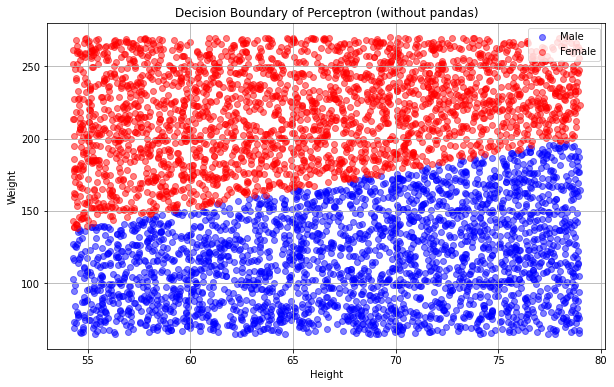

In [94]:
import copy
X_np = copy.deepcopy(X_train)
y_np = copy.deepcopy(y_train)

# Train the Perceptron
percept_np = Perceptron(eta=0.01, epochs=100)
percept_np.train(X_np, y_np)

# Create 5000 random input samples
random_ht_np = np.random.uniform(X_np[:, 0].min(), X_np[:, 0].max(), 5000)
random_wgt_np = np.random.uniform(X_np[:, 1].min(), X_np[:, 1].max(), 5000)
ran_samples_np = np.column_stack((random_ht_np, random_wgt_np))

# Predict the labels for these random samples
pred_np = percept_np.predict(ran_samples_np)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.scatter(ran_samples_np[pred_np == 1][:, 0], ran_samples_np[pred_np == 1][:, 1], color='blue', label='Male', alpha=0.5)
plt.scatter(ran_samples_np[pred_np == -1][:, 0], ran_samples_np[pred_np == -1][:, 1], color='red', label='Female', alpha=0.5)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Decision Boundary of Perceptron (without pandas)')
plt.legend()
plt.grid(True)
plt.show()

### Then, discuss the following in Markdown cells:



**1. Describe what is happening as the training progresses?**

**Ans:**
The perceptron is a basic linear classification technique. It has an iterative and error-driven training process. The perceptron traverses the whole training dataset at each epoch and makes predictions based on the current weights. When a prediction is erroneous (i.e., the predicted class differs from the actual class), the perceptron's weights are updated. The inaccuracy and learning rate influence the magnitude and direction of the weight updates.
The step size for weight modifications is determined by the learning rate. A slower learning rate causes the perceptron to learn slowly and cautiously, whereas a quicker learning rate causes oscillations.
The discrepancy between the actual and predicted class labels is the error.
The feature vector for a given training example is used as the input.
The perceptron continues to alter its weights in response to the errors it produces as training goes, with the goal of decreasing those errors. This iterative weight modification procedure assists the perceptron in learning a decision boundary that optimally distinguishes the classes in the training data over time.


**2. Do we arrive at the very best solution at the last epoch, or is there an epoch with a lower error? Why is that?**

**Ans:**
No, not always. By the last epoch, the perceptron may or may not have found the optimum answer. The error rate fluctuated over epochs, according to the error graph we saw before. This is due to the fact that the perceptron's weight updates are based on individual training samples, and particular training examples may momentarily push the decision boundary in an unfavourable direction. This can result in minor increases in error for particular epochs, despite the overall trend of reducing errors.
It is also feasible that the perceptron will become trapped in a local minimum, where further training will not result in significant improvements. This is especially true if the data is not linearly separable, as the perceptron will continue to search for a perfect linear decision boundary, which does not exist.

**Why can’t we get zero errors with this data**

**Ans:**
The perceptron algorithm looks for a linear decision boundary that can be used to divide the classes. However, data points from distinct classes may overlap in the feature space in many real-world datasets, including the height-weight dataset we used. This indicates that there is no straight line (or hyperplane in higher dimensions) that can fully segregate all data points of one class from all data points of another.
If the data is not linearly separable, no matter how many epochs it is trained for, the perceptron will never converge to a solution with zero errors. In our dataset, there are boys and females with comparable heights and weights, resulting in feature space overlaps. The fundamental reason we can't reach zero mistakes with a linear model like the perceptron is because of this intrinsic overlap.

### Perceptron with early exit criterion

Create a copy of the Perceptron class, and rename it to something reasonable, like PerceptronEE. Implement an early exit, to exit the training once convergence has been achieved, i.e. once the error is at an acceptable level.

In [97]:
class PerceptronEE(object):

    def __init__(self, eta=0.01, epochs=50, tolerance=0):
        self.eta = eta
        self.epochs = epochs
        self.tolerance = tolerance

    def train(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] +=  update * xi
                self.w_[0] +=  update
                errors += int(update != 0.0)
            self.errors_.append(errors)
            
            # Early exit if errors are below the tolerance level or are 0
            if errors <= self.tolerance:
                break

        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)
